In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [111]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [26]:
train_data = pd.read_csv('train_6BJx641.csv', parse_dates=True, index_col='ID')
train_data

,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
ID,,,,,,,
0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0
...,...,...,...,...,...,...,...
34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,A,225.0
34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,A,213.0
34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,A,213.0


<AxesSubplot:xlabel='ID'>

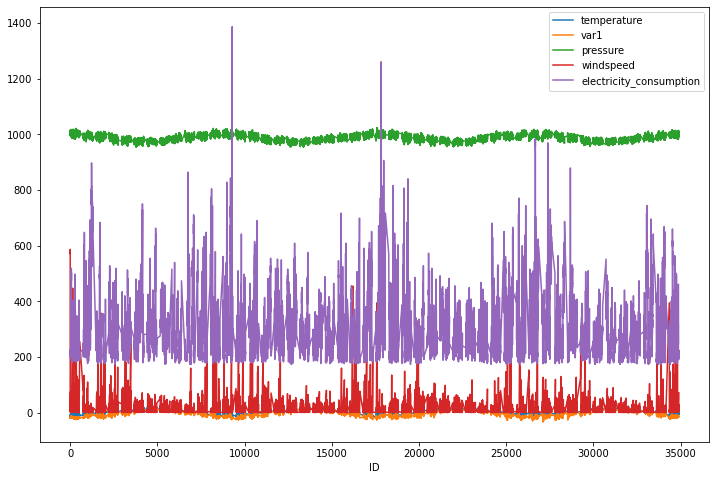

In [27]:
train_data.plot(figsize=(12,8))

In [28]:
train_data['var2'].unique()

array(['A', 'B', 'C'], dtype=object)

In [29]:
enc = OrdinalEncoder()
train_data[['var2']] = enc.fit_transform(train_data[['var2']])
train_data

,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
ID,,,,,,,
0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,0.0,216.0
1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,0.0,210.0
2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,0.0,225.0
3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,0.0,216.0
4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,0.0,222.0
...,...,...,...,...,...,...,...
34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,0.0,225.0
34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,0.0,213.0
34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,0.0,213.0


In [31]:
nSplit=int(len(train_data)*0.8)
nSplit

21196

In [126]:
X=train_data.iloc[:,1:-1].values
X

array([[ -11.4  ,  -17.1  , 1003.   ,  571.91 ,    0.   ],
       [ -12.1  ,  -19.3  ,  996.   ,  575.04 ,    0.   ],
       [ -12.9  ,  -20.   , 1000.   ,  578.435,    0.   ],
       ...,
       [  -1.4  ,  -12.9  ,  995.   ,   61.275,    0.   ],
       [  -2.9  ,  -11.4  ,  996.   ,   67.21 ,    0.   ],
       [  -2.1  ,  -11.4  , 1009.   ,   71.88 ,    0.   ]])

In [77]:
X_date = train_data.iloc[:,0].values
Xtrain_date, Xtest_date=X_date[0:nSplit],X_date[nSplit:] 

In [53]:
Y=train_data.iloc[:,-1].values
Y

array([216., 210., 225., ..., 213., 210., 210.])

In [54]:
Ytrain, Ytest=Y[0:nSplit],Y[nSplit:]
Xtrain, Xtest=X[0:nSplit,:],X[nSplit:,:]

In [58]:
score = []
for n in np.arange(100, 1000, 100):
    print('n_estimatorsh= ', str(n))
    for d in range(1,10):
        rfr=RandomForestRegressor(n_estimators= n , max_depth=d)
        rfr.fit(Xtrain,Ytrain)
        print('max_depth= ', str(d))
        train_score = rfr.score(Xtrain,Ytrain)
        #print()
        test_score = rfr.score(Xtest,Ytest)
        score.append((n, d, train_score, test_score))

n_estimatorsh=  100
max_depth=  1
max_depth=  2
max_depth=  3
max_depth=  4
max_depth=  5
max_depth=  6
max_depth=  7
max_depth=  8
max_depth=  9
n_estimatorsh=  200
max_depth=  1
max_depth=  2
max_depth=  3
max_depth=  4
max_depth=  5
max_depth=  6
max_depth=  7
max_depth=  8
max_depth=  9
n_estimatorsh=  300
max_depth=  1
max_depth=  2
max_depth=  3
max_depth=  4
max_depth=  5
max_depth=  6
max_depth=  7
max_depth=  8
max_depth=  9
n_estimatorsh=  400
max_depth=  1
max_depth=  2
max_depth=  3
max_depth=  4
max_depth=  5
max_depth=  6
max_depth=  7
max_depth=  8
max_depth=  9
n_estimatorsh=  500
max_depth=  1
max_depth=  2
max_depth=  3
max_depth=  4
max_depth=  5
max_depth=  6
max_depth=  7
max_depth=  8
max_depth=  9
n_estimatorsh=  600
max_depth=  1
max_depth=  2
max_depth=  3
max_depth=  4
max_depth=  5
max_depth=  6
max_depth=  7
max_depth=  8
max_depth=  9
n_estimatorsh=  700
max_depth=  1
max_depth=  2
max_depth=  3
max_depth=  4
max_depth=  5
max_depth=  6
max_depth=  7
max_de

In [67]:
final_rfr = list(max(score,key=lambda item:item[3]))
final_rfr

[100, 9, 0.4100655870279809, 0.18861555289669152]

In [70]:
rfr=RandomForestRegressor(n_estimators= final_rfr[0] , max_depth=final_rfr[1])
rfr.fit(Xtrain,Ytrain)
rfr_pred = rfr.predict(Xtest)
rfr_pred

array([263.69044928, 326.87566627, 261.84893547, ..., 221.99551729,
       268.93276174, 254.4708628 ])

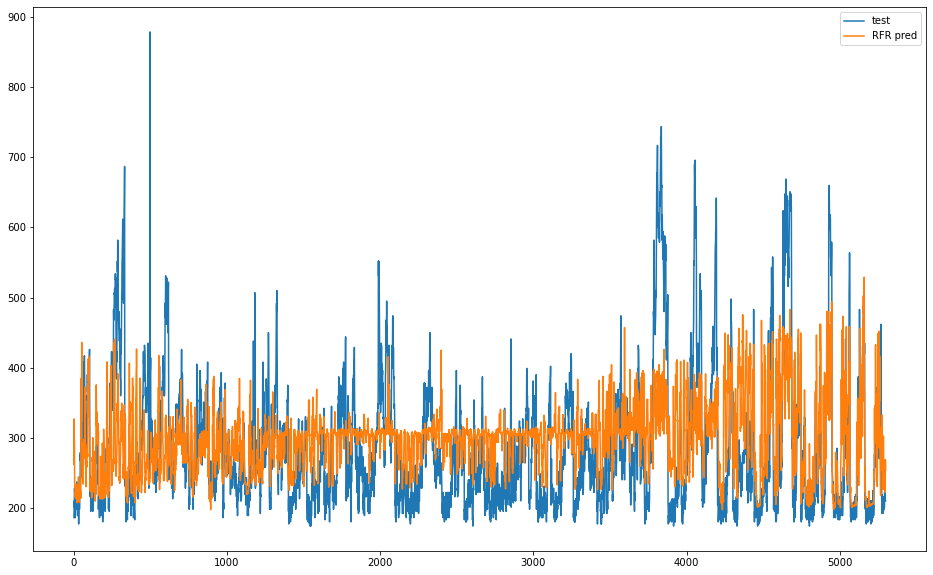

In [107]:
plt.figure(figsize=(16, 10))
plt.plot( Ytest, label='test')
plt.plot( rfr_pred, label='RFR pred')
plt.legend(loc="upper right")

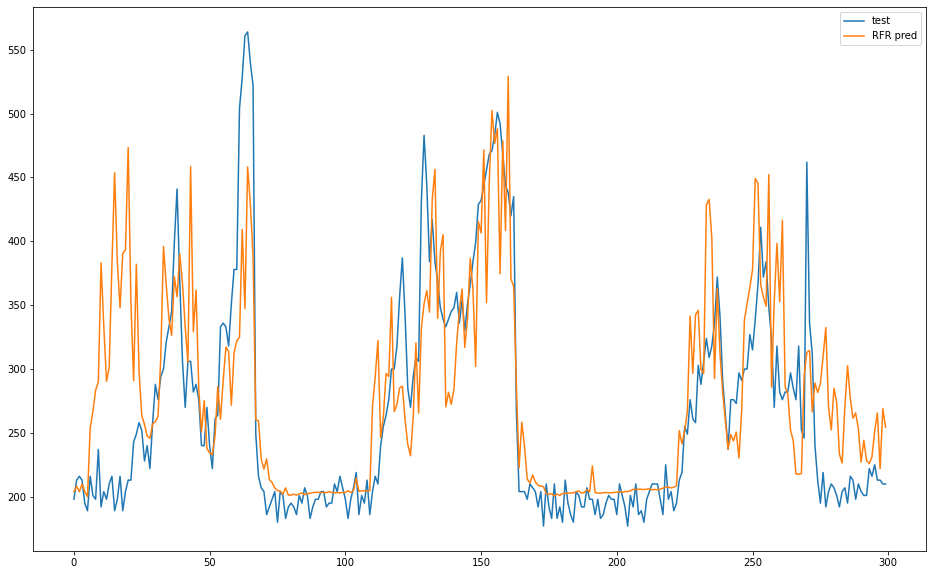

In [108]:
plt.figure(figsize=(16, 10))
plt.plot( Ytest[5000:], label='test')
plt.plot( rfr_pred[5000:], label='RFR pred')
plt.legend(loc="upper right")

In [112]:
print('Random Forest Regressor Error')
print(mean_absolute_percentage_error(Ytest, rfr_pred))

Random Forest Regressor Error
0.22674472742151353


In [109]:
score_gbr = []
for n in np.arange(100, 1000, 100):
    print('n_estimators = ', str(n))
    for d in range(1,10):
        gbr=GradientBoostingRegressor(n_estimators= n , max_depth=d)
        gbr.fit(Xtrain,Ytrain)
        train_score = gbr.score(Xtrain,Ytrain)
        test_score = gbr.score(Xtest,Ytest)
        score_gbr.append((n, d, train_score, test_score))

n_estimators =  100
n_estimators =  200
n_estimators =  300
n_estimators =  400
n_estimators =  500
n_estimators =  600
n_estimators =  700
n_estimators =  800
n_estimators =  900


In [110]:
final_gbr = list(max(score_gbr,key=lambda item:item[3]))
final_gbr

[900, 2, 0.342519428203505, 0.19808167183572878]

In [113]:
gbr=GradientBoostingRegressor(n_estimators= final_gbr[0] , max_depth=final_gbr[1])
gbr.fit(Xtrain,Ytrain)
gbr_pred = gbr.predict(Xtest)
gbr_pred

array([233.00080293, 308.72123592, 271.24573675, ..., 228.6807355 ,
       245.20897982, 231.86511547])

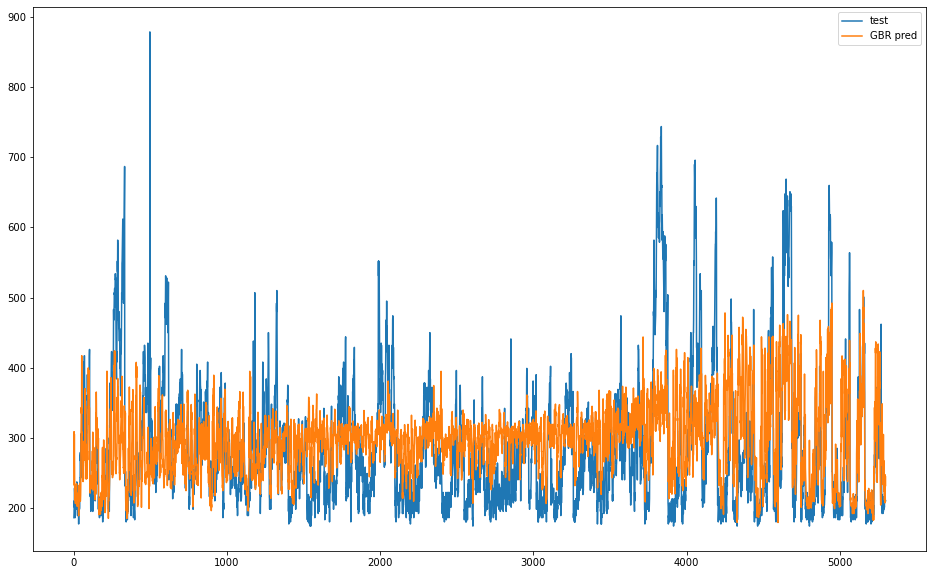

In [119]:
plt.figure(figsize=(16, 10))
plt.plot( Ytest, label='test')
plt.plot( gbr_pred, label='GBR pred')
plt.legend(loc="upper right")

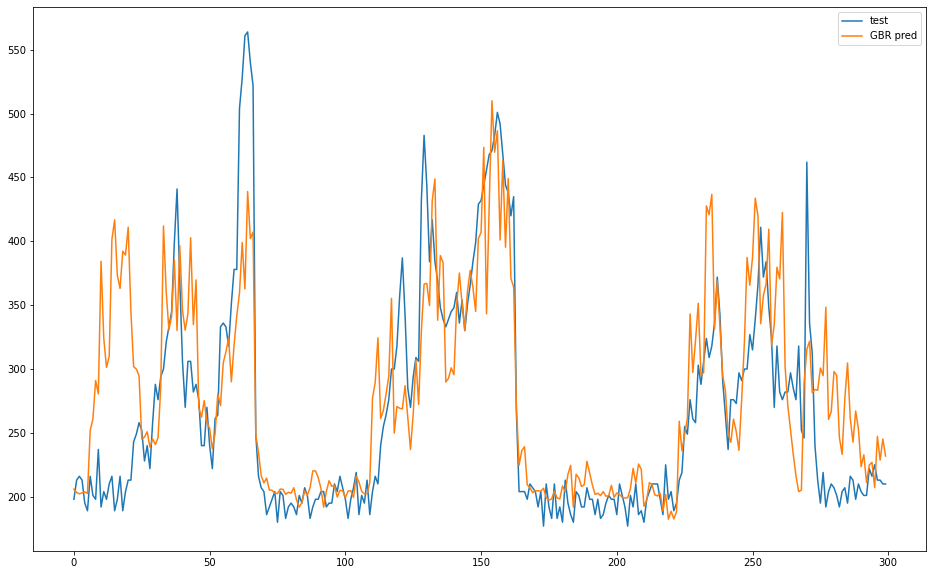

In [118]:
plt.figure(figsize=(16, 10))
plt.plot( Ytest[5000:], label='test')
plt.plot( gbr_pred[5000:], label='GBR pred')
plt.legend(loc="upper right")

In [117]:
print('Gradient Boosting Regressor Error')
print(mean_absolute_percentage_error(Ytest, gbr_pred))

Gradient Boosting Regressor Error
0.22271827634664454


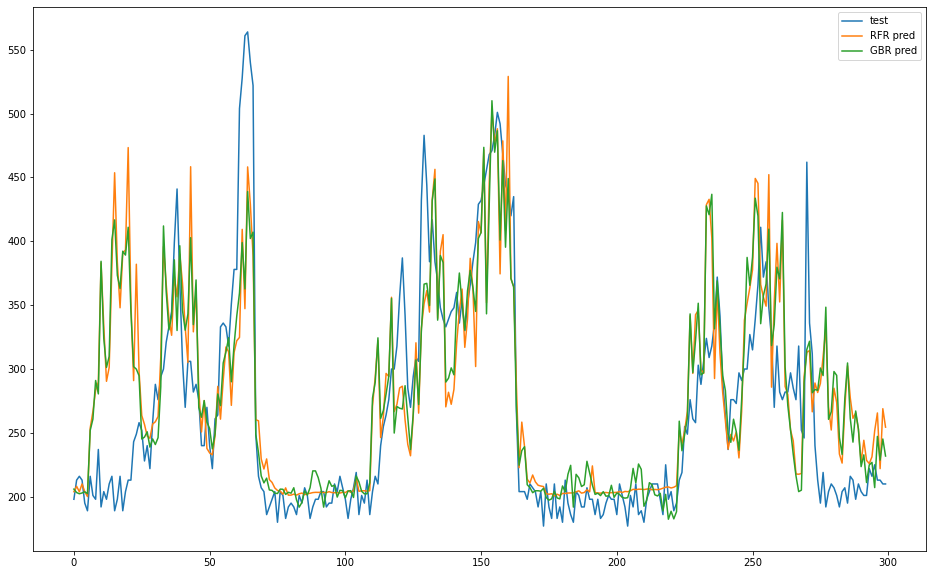

In [120]:
plt.figure(figsize=(16, 10))
plt.plot( Ytest[5000:], label='test')
plt.plot( rfr_pred[5000:], label='RFR pred')
plt.plot( gbr_pred[5000:], label='GBR pred')
plt.legend(loc="upper right")

In [121]:
test = pd.read_csv('test_pavJagI.csv', parse_dates=True, index_col='ID')
test

,datetime,temperature,var1,pressure,windspeed,var2
ID,,,,,,
552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A
553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A
554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A
555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A
556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A
...,...,...,...,...,...,...
35059,2017-06-30 19:00:00,-5.7,-18.6,998.0,233.595,A
35060,2017-06-30 20:00:00,-5.7,-17.1,995.0,238.780,A
35061,2017-06-30 21:00:00,-7.1,-19.3,1004.0,244.325,A


In [129]:
enc = OrdinalEncoder()
test[['var2']] = enc.fit_transform(test[['var2']])
test

,datetime,temperature,var1,pressure,windspeed,var2
ID,,,,,,
552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,0.0
553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,0.0
554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,0.0
555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,0.0
556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,0.0
...,...,...,...,...,...,...
35059,2017-06-30 19:00:00,-5.7,-18.6,998.0,233.595,0.0
35060,2017-06-30 20:00:00,-5.7,-17.1,995.0,238.780,0.0
35061,2017-06-30 21:00:00,-7.1,-19.3,1004.0,244.325,0.0


In [130]:
Xfinal=test.iloc[:,1:].values
Xfinal

array([[ -10.   ,  -16.4  , 1011.   ,  263.28 ,    0.   ],
       [ -10.   ,  -20.7  , 1011.   ,  267.175,    0.   ],
       [ -10.7  ,  -17.1  , 1003.   ,  269.555,    0.   ],
       ...,
       [  -7.1  ,  -19.3  , 1004.   ,  244.325,    0.   ],
       [  -6.4  ,  -19.3  , 1008.   ,  247.47 ,    0.   ],
       [  -5.   ,  -16.4  , 1001.   ,  250.6  ,    0.   ]])

In [131]:
gbr=GradientBoostingRegressor(n_estimators= final_gbr[0] , max_depth=final_gbr[1])
gbr.fit(X,Y)
final_pred = gbr.predict(Xfinal)
final_pred

array([201.52141713, 191.37693421, 206.6316746 , ..., 198.77383131,
       198.69793427, 203.46237985])

In [147]:
final_df = pd.DataFrame(final_pred, index=test.index)

In [148]:
final_df

,0
ID,
552,201.521417
553,191.376934
554,206.631675
555,215.249970
556,264.610081
...,...
35059,198.706589
35060,202.549426
35061,198.773831


In [149]:
final_df.columns = [['electricity_consumption']]

In [150]:
final_df

,electricity_consumption
ID,
552,201.521417
553,191.376934
554,206.631675
555,215.249970
556,264.610081
...,...
35059,198.706589
35060,202.549426
35061,198.773831


In [1]:
final_df.to_csv('sample_submission.csv')

NameError: name 'final_df' is not defined